# Trying to install needed package "geopy" and "folium" if not already installed

In [167]:
conda_package_check = !conda list geopy
if 'geopy' not in str(conda_package_check[-1]):
    print('Anaconda package "geopy" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge geopy --yes    
else:
    print('Anaconda package "geopy" is installed.\n No further actions needed...')
    
conda_package_check = !conda list folium
if 'folium' not in str(conda_package_check[-1]):
    print('Anaconda package "folium" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge folium=0.5.0 --yes    
else:
    print('Anaconda package "folium" is installed.\n No further actions needed...')
    
conda_package_check = !conda list tabula-py
if 'tabula-py' not in str(conda_package_check[-1]):
    print('Anaconda package "tabula-py" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge tabula-py --yes    
else:
    print('Anaconda package "tabula-py" is installed.\n No further actions needed...')
    
conda_package_check = !conda list beautifulsoup4
if 'beautifulsoup4' not in str(conda_package_check[-1]):
    print('Anaconda package "beautifulsoup4" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge beautifulsoup4 --yes
else:
    print('Anaconda package "beautifulsoup4" is installed.\n No further actions needed...')
    
conda_package_check = !conda list lxml
if 'lxml' not in str(conda_package_check[-1]):
    print('Anaconda package "lxml" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge lxml --yes    
else:
    print('Anaconda package "lxml" is installed.\n No further actions needed...')

Anaconda package "geopy" is installed.
 No further actions needed...
Anaconda package "folium" is installed.
 No further actions needed...
Anaconda package "tabula-py" is installed.
 No further actions needed...
Anaconda package "beautifulsoup4" is installed.
 No further actions needed...
Anaconda package "lxml" is not installed yet.
 Installation will be executed now...
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-3.8.0                 |           py36_0         3.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  libxslt       

## Load needed libraries and packages

In [4]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize

import tabula

import json 

import requests 

from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Libraries imported.


In [84]:
muc_crime = pd.read_csv('muc_crime.csv', index_col=0)
muc_crime

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes
1,Altstadt-Lehel,8205,3,93,1115,2604,575,1346,8157
2,Ludwigsvorstadt-Isarvorstadt,14091,6,212,1887,2806,688,1571,12443
3,Maxvorstadt,4799,2,63,727,993,492,587,4659
4,Schwabing West,2310,3,40,281,397,466,334,2305
5,Au-Haidhausen,3531,2,34,406,772,429,789,3469
6,Sendling,1983,2,22,274,270,325,338,1971
7,Sendling-Westpark,2234,-,38,335,297,328,412,2215
8,Schwanthalerhoehe,1703,2,13,275,257,244,243,1638
9,Neuhausen-Nymphenburg,3913,2,51,558,712,813,553,3815
10,Moosach,2796,1,32,414,613,324,568,2771


In [66]:
# Get loaction data of Munich using latitude and longitude values
muc_address = 'Munich, Germany'
geolocator = Nominatim(user_agent="ger_explorer")
muc_location = geolocator.geocode(muc_address)
muc_latitude = muc_location.latitude
muc_longitude = muc_location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(muc_latitude, muc_longitude))

# Get location data of boroughs of Munich using latitude and longitude values
brh_lat = {}
brh_lng = {}
for borough in muc_crime['Borough']:
    brh_address = borough + '(Munich), Germany'
    geolocator = Nominatim(user_agent="ger_explorer")
    brh_location = geolocator.geocode(brh_address)
    brh_latitude = brh_location.latitude
    brh_longitude = brh_location.longitude
    brh_lat[borough] = brh_latitude
    brh_lng[borough] = brh_longitude
    print('  - The geograpical coordinate of {}(Munich) are {}, {}.'.format(borough, brh_latitude, brh_longitude))    

The geograpical coordinate of Munich are 48.1371079, 11.5753822.
  - The geograpical coordinate of Altstadt-Lehel (Munich) are 48.1378285, 11.5745823.
  - The geograpical coordinate of Ludwigsvorstadt-Isarvorstadt (Munich) are 48.1317712, 11.5558087.
  - The geograpical coordinate of Maxvorstadt (Munich) are 48.1510916, 11.5624179.
  - The geograpical coordinate of Schwabing West (Munich) are 48.1682709, 11.5698727.
  - The geograpical coordinate of Au-Haidhausen (Munich) are 48.1287531, 11.5905362.
  - The geograpical coordinate of Sendling (Munich) are 48.1180125, 11.5390832.
  - The geograpical coordinate of Sendling-Westpark (Munich) are 48.11803085, 11.519332770284128.
  - The geograpical coordinate of Schwanthalerhoehe (Munich) are 48.1337822, 11.5410566.
  - The geograpical coordinate of Neuhausen-Nymphenburg (Munich) are 48.1542217, 11.5315172.
  - The geograpical coordinate of Moosach (Munich) are 48.1798949, 11.5105712.
  - The geograpical coordinate of Milbertshofen-Am Hart 

In [85]:
# Add location data of boroughs to data frame
muc_crime['Latitude'] = muc_crime['Borough'].map(brh_lat)    
muc_crime['Longitude'] = muc_crime['Borough'].map(brh_lng)
muc_crime

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Latitude,Longitude
1,Altstadt-Lehel,8205,3,93,1115,2604,575,1346,8157,48.137828,11.574582
2,Ludwigsvorstadt-Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,48.131771,11.555809
3,Maxvorstadt,4799,2,63,727,993,492,587,4659,48.151092,11.562418
4,Schwabing West,2310,3,40,281,397,466,334,2305,48.168271,11.569873
5,Au-Haidhausen,3531,2,34,406,772,429,789,3469,48.128753,11.590536
6,Sendling,1983,2,22,274,270,325,338,1971,48.118012,11.539083
7,Sendling-Westpark,2234,-,38,335,297,328,412,2215,48.118031,11.519333
8,Schwanthalerhoehe,1703,2,13,275,257,244,243,1638,48.133782,11.541057
9,Neuhausen-Nymphenburg,3913,2,51,558,712,813,553,3815,48.154222,11.531517
10,Moosach,2796,1,32,414,613,324,568,2771,48.179895,11.510571


In [139]:
# Create map of Munich using latitude and longitude values
map_muc = folium.Map(location=[muc_latitude, muc_longitude], zoom_start=12)

# Get location data of boroughs of Munich and add them to the map
for lat, lng, borough in zip(muc_crime['Latitude'], muc_crime['Longitude'], muc_crime['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_muc)  
    
map_muc

In [99]:
muc_crime.sort_values(['Total major crimes'], ascending = False, axis = 0, inplace = True)
muc_crime_top5 = muc_crime.head()
muc_crime_top5

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Latitude,Longitude
2,Ludwigsvorstadt-Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,48.131771,11.555809
12,Schwabing-Freimann,8413,4,78,861,1092,656,1115,5413,48.170089,11.588486
1,Altstadt-Lehel,8205,3,93,1115,2604,575,1346,8157,48.137828,11.574582
3,Maxvorstadt,4799,2,63,727,993,492,587,4659,48.151092,11.562418
16,Ramersdorf-Perlach,4712,3,74,718,877,721,895,4690,48.114140,11.614255


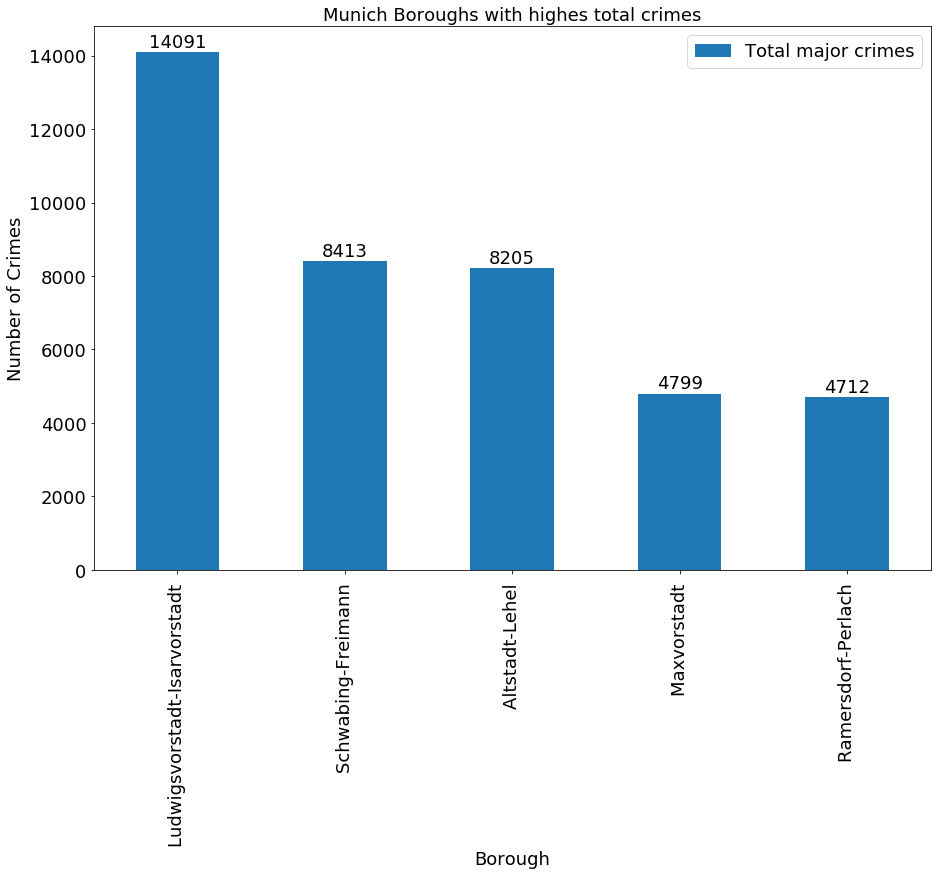

In [134]:
df_top = muc_crime_top5[['Borough','Total major crimes']]

df_top.set_index('Borough',inplace = True)

ax = df_top.plot(kind='bar', figsize=(15, 10))

ax.set_ylabel('Number of Crimes', fontsize=18) # add to x-label to the plot
ax.set_xlabel('Borough', fontsize=18) # add y-label to the plot
ax.set_title('Munich Boroughs with highes total crimes', fontsize=18) # add title to the plot
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper right', prop={'size': 18})

# Creating a function to display total number of crimes.
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 18
               )

In [135]:
muc_crime.sort_values(['Total major crimes'], ascending = True, axis = 0, inplace = True)
muc_crime_bottom5 = muc_crime.head()
muc_crime_bottom5

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Latitude,Longitude
23,Allach-Untermenzing,1106,2,10,166,161,199,151,1100,48.195994,11.457013
20,Hadern,1556,1,20,233,345,270,212,1544,48.118064,11.481842
22,Aubing-Lochhausen-Langwied,1620,1,21,330,268,230,216,1604,48.158437,11.414066
18,Untergiesing-Harlaching,1691,2,21,249,244,237,258,1677,48.114963,11.570189
8,Schwanthalerhoehe,1703,2,13,275,257,244,243,1638,48.133782,11.541057


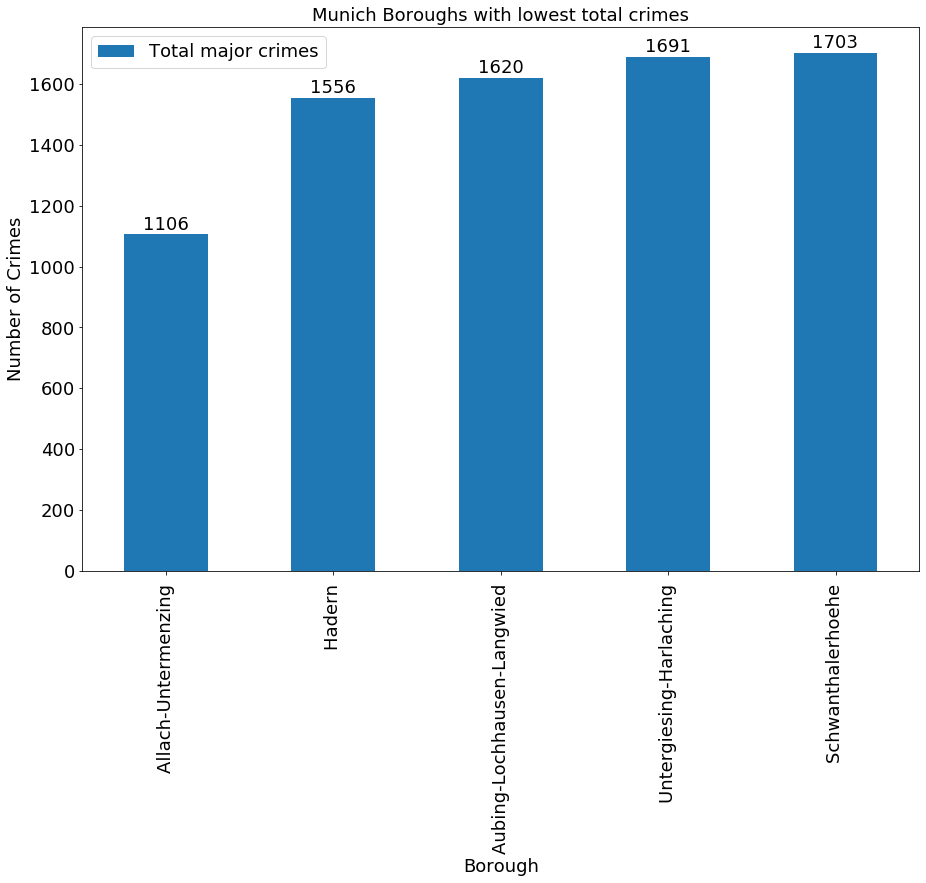

In [138]:
df_bottom = muc_crime_bottom5[['Borough','Total major crimes']]

df_bottom.set_index('Borough',inplace = True)

ax = df_bottom.plot(kind='bar', figsize=(15, 10))

ax.set_ylabel('Number of Crimes', fontsize=18) # add to x-label to the plot
ax.set_xlabel('Borough', fontsize=18) # add y-label to the plot
ax.set_title('Munich Boroughs with lowest total crimes', fontsize=18) # add title to the plot
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper left', prop={'size': 18})

# Creating a function to display total number of crimes.
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 18
               )

#### Define Foursquare Credentials and Version

In [8]:
CLIENT_ID = '2IL5H5ZWSYSKRCBHTQUZ302YBKXM10CEA21FU1IJBUMWAYCG' # your Foursquare ID
CLIENT_SECRET = '4W1EQKW1C02K0DHICC3HTAVC2T2ZHTASX2O152FTTJ3I010K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2IL5H5ZWSYSKRCBHTQUZ302YBKXM10CEA21FU1IJBUMWAYCG
CLIENT_SECRET:4W1EQKW1C02K0DHICC3HTAVC2T2ZHTASX2O152FTTJ3I010K


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [163]:
df_best =  muc_crime_bottom5[muc_crime_bottom5['Borough'] == 'Allach-Untermenzing']
df_best
muc_crime_bottom5

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Latitude,Longitude
23,Allach-Untermenzing,1106,2,10,166,161,199,151,1100,48.195994,11.457013
20,Hadern,1556,1,20,233,345,270,212,1544,48.118064,11.481842
22,Aubing-Lochhausen-Langwied,1620,1,21,330,268,230,216,1604,48.158437,11.414066
18,Untergiesing-Harlaching,1691,2,21,249,244,237,258,1677,48.114963,11.570189
8,Schwanthalerhoehe,1703,2,13,275,257,244,243,1638,48.133782,11.541057


Get the neighborhood's latitude and longitude values.

In [183]:
# Returns list of all tables on page
muc_housing_url='https://www.immobilienscout24.de/neubau/ratgeber/aktuelle-neubau-themen/neubau-kauf-map-wohnungen-muenchen-2019.html'
tables = pd.read_html(muc_housing_url, flavor='html5lib', header=0)
for table in tables:
    if 'Stadtteil' in table:
        muc_housing = table
        break
muc_housing

,Stadtteil,Aktueller Quadratmeterpreis,Preiswachstum zum Vorjahr
0,Maxvorstadt,13.095 Euro,"7,4%"
1,Lehel,12.746 Euro,"4,6%"
2,Schwabing-West,12.923 Euro,"7,5%"
3,Ludwigsvorstadt-Isarvorstadt,12.207 Euro,"6,7%"
4,Au,12.165 Euro,"7,3%"
5,Schwabing,11.710 Euro,"6,6%"
6,Neuhausen,11.303 Euro,"7,2%"
7,Haidhausen,11.042 Euro,"5,7%"
8,Nymphenburg,10.943 Euro,"6,4%"
9,Thalkirchen,10.586 Euro,"6,1%"


In [194]:
# Returns list of all tables on page
import requests
muc_nbh_brg_URL = requests.get('https://de.wikipedia.org/wiki/Liste_der_Stadtteile_Münchens').content
tables = pd.read_html(muc_nbh_brg_URL, flavor='html5lib', header=0, encoding='utf-8')
for table in tables:
    if 'Stadtteil' in table:
        muc_nbh_brg = table
        break
muc_nbh_brg


,Stadtteil,"Stadtbezirk, in dem der Stadtteil (größtenteils) liegt",Stadt-bezirks-nr.,Quartiere und Siedlungen im Stadtteil
0,Allach,Allach-Untermenzing,23,"Allach, Gerberau"
1,Altstadt,Altstadt-Lehel,1,"Angerviertel, Graggenauviertel, Hackenviertel,..."
2,Am Hart,Milbertshofen-Am Hart,11,"Am Hart, Harthof (Ostteil), Nordhaide"
3,Am Moosfeld,Trudering-Riem,15,Am Moosfeld
4,Am Riesenfeld,Milbertshofen-Am Hart,11,"Studentenviertel Oberwiesenfeld, Am Oberwiesen..."
5,Au,Au-Haidhausen,5,"Obere Au, Untere Au, Falkenau, Neudeck"
6,Aubing,Aubing-Lochhausen-Langwied,22,"(Alt-)Aubing, Aubing-Ost, Dorniersiedlung, Kol..."
7,Berg am Laim,Berg am Laim,14,"Berg am Laim, Baumkirchen, Josephsburg, Werksv..."
8,Bogenhausen,Bogenhausen,13,"(Alt-)Bogenhausen, Arabellapark, Brunnthal, Ga..."
9,Daglfing,Bogenhausen,13,"Daglfing, Dianapark, Kolonie Daglfing, Kolonie..."
